##  Task 3 - Mobile Price classification using Macine Learning 

#### Normal Task

#### By : Shweta Kulkarni

In [1]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data=pd.read_csv("train.csv")
pd.options.display.max_columns=50

### Domain Analysis
* battery_power - Total energy a battery can store in one time measured in mAh
* blue - Has bluetooth or not
* clock_speed - Speed at which microprocessor executes instructions
* dual_sim - Has dual sim support or not
* fc - Front Camera mega pixels
* four_g - Has 4G or not
* int_memory - Internal Memory in Gigabytes
* m_dep - Mobile Depth in cm
* mobile_wt - Weight of mobile phone
* n_cores - Number of cores of processor
* pc - Primary Camera mega pixels
* px_height - Pixel Resolution Height
* px_width - Pixel Resolution Width
* ram - Random Access Memory in Megabytes
* sc_h - Screen Height of mobile in cm
* sc_w - Screen Width of mobile in cm
* talk_time - Longest time that a single battery charge will last when you are on call
* three_g - Has 3G or not
* touch_screen - Has touch screen or not
* wifi - Has wifi or not
* price_range - Range of mobile price

## Basic Checks

In [3]:
# First five rows
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
# Last five rows
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [5]:
# Shape of data
data.shape

(2000, 21)

In [6]:
# Columns in data
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [7]:
# Statistics of data
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
# Examine data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## Exploratory Data Analysis

##### Univariate Analysis

<AxesSubplot:xlabel='battery_power', ylabel='Count'>

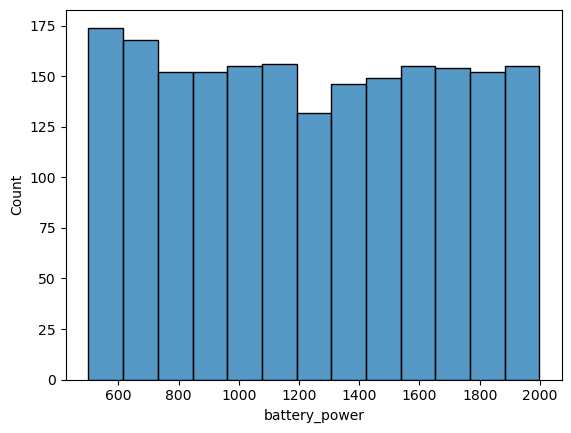

In [9]:
# PLotting histograms give us the distribution for a singular feature.
sns.histplot(x="battery_power",data=data)

* count of battery power range 600-800 is high.

<AxesSubplot:xlabel='ram', ylabel='Count'>

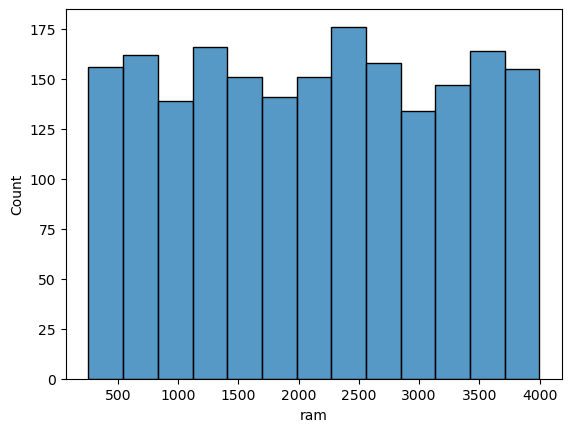

In [10]:
sns.histplot(x='ram',data=data)

* Ram 2300 high in count.

<AxesSubplot:xlabel='touch_screen', ylabel='count'>

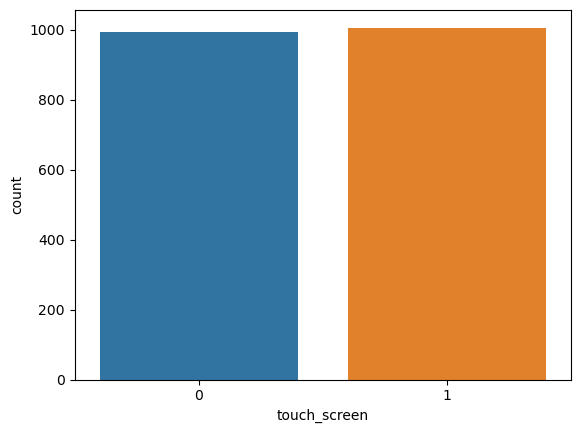

In [11]:
sns.countplot(x='touch_screen',data=data)

* count for touch screen 1 is high.

<AxesSubplot:xlabel='blue', ylabel='count'>

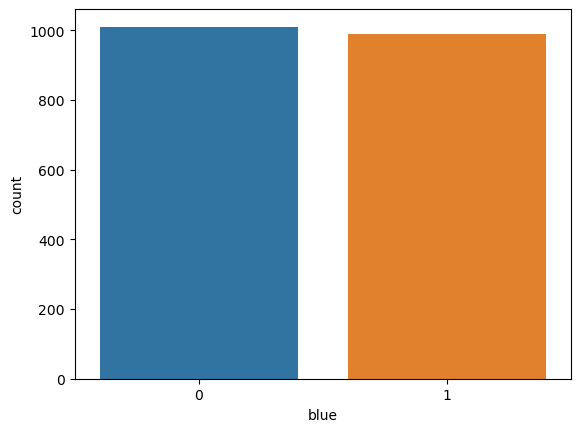

In [12]:
sns.countplot(x='blue',data=data)

* count plot for blue of 1 is high.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_range', ylabel='Density'>

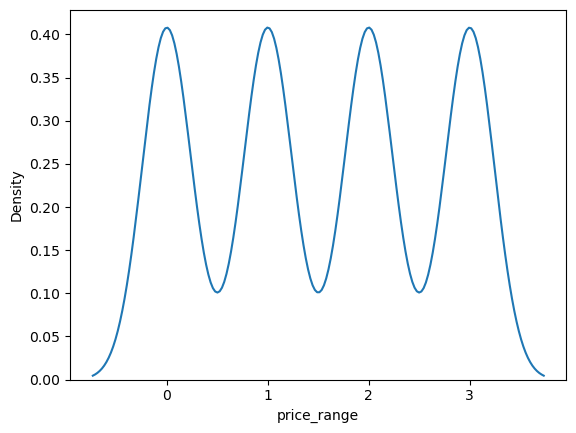

In [13]:
sns.distplot(data.price_range,hist=False)

* price range is uniform.

<AxesSubplot:xlabel='n_cores', ylabel='count'>

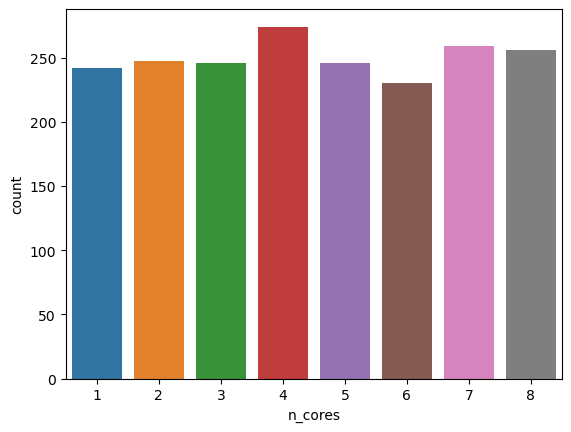

In [14]:
sns.countplot(x='n_cores',data=data)

* Number of cores of processor more in count at 4 and 7.

##### Bivariate analysis

<AxesSubplot:xlabel='touch_screen', ylabel='price_range'>

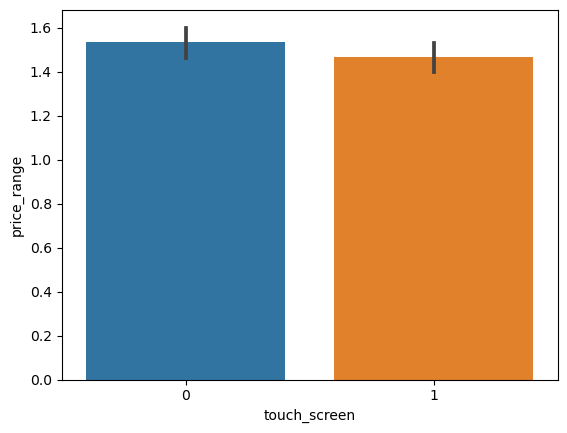

In [15]:
sns.barplot(x='touch_screen',y='price_range',data=data)

* More pricing is seen for phones with Touchscreen feature available.

<AxesSubplot:xlabel='four_g', ylabel='price_range'>

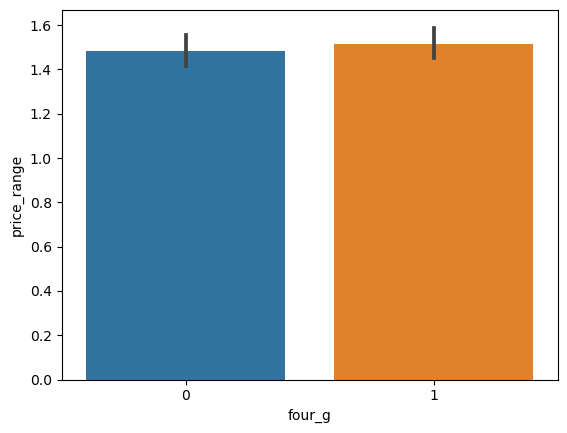

In [16]:
sns.barplot(x='four_g',y='price_range',data=data)

* Makes difference in price if 4G/LTE network is made available.

<AxesSubplot:xlabel='three_g', ylabel='price_range'>

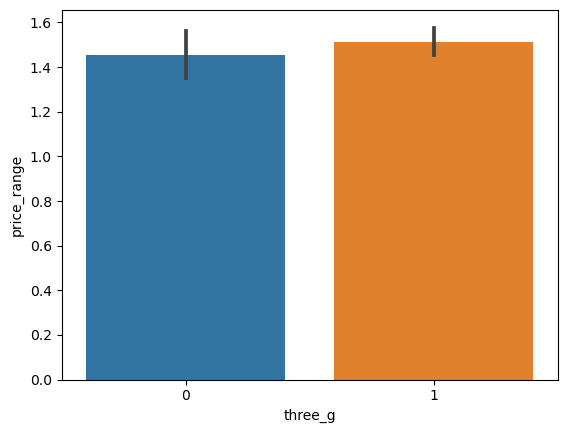

In [17]:
sns.barplot(x='three_g',y='price_range',data=data)

* A good proportion of phones offering 3G also offer 4G/LTE network options.

<AxesSubplot:xlabel='fc', ylabel='price_range'>

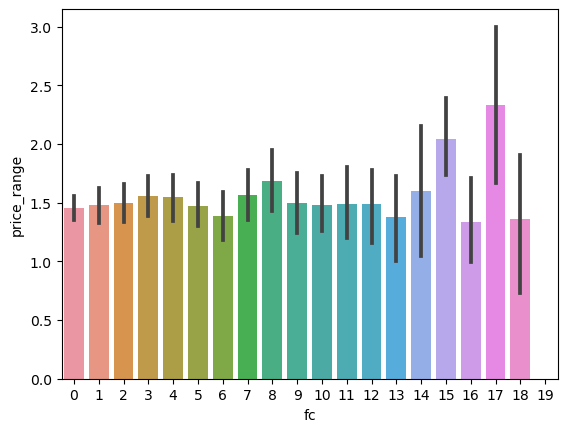

In [18]:
sns.barplot(x='fc',y='price_range',data=data)

* 18 Front Camera mega pixels followed by 15 Front Camera mega pixels lead to the highest average pricing of phones.

<AxesSubplot:xlabel='n_cores', ylabel='price_range'>

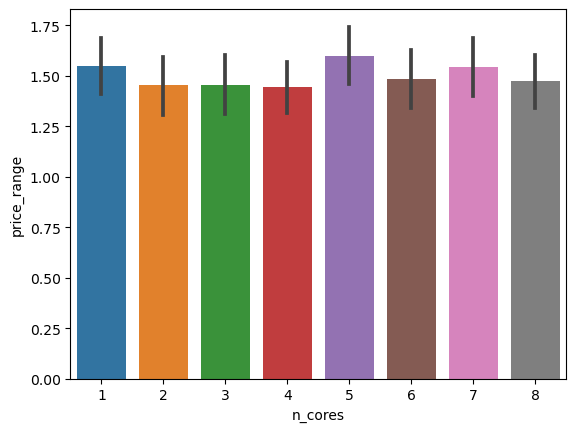

In [19]:
sns.barplot(x='n_cores',y='price_range',data=data)

* 5 Number of cores of processor followed by 1 Number of cores of processor lead to the highest average pricing of phones.

### Data preprocessing and Feature engineering

In [20]:
# Checking missing values
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

* No missing values present.

In [21]:
data.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

### Feature selection

<AxesSubplot:>

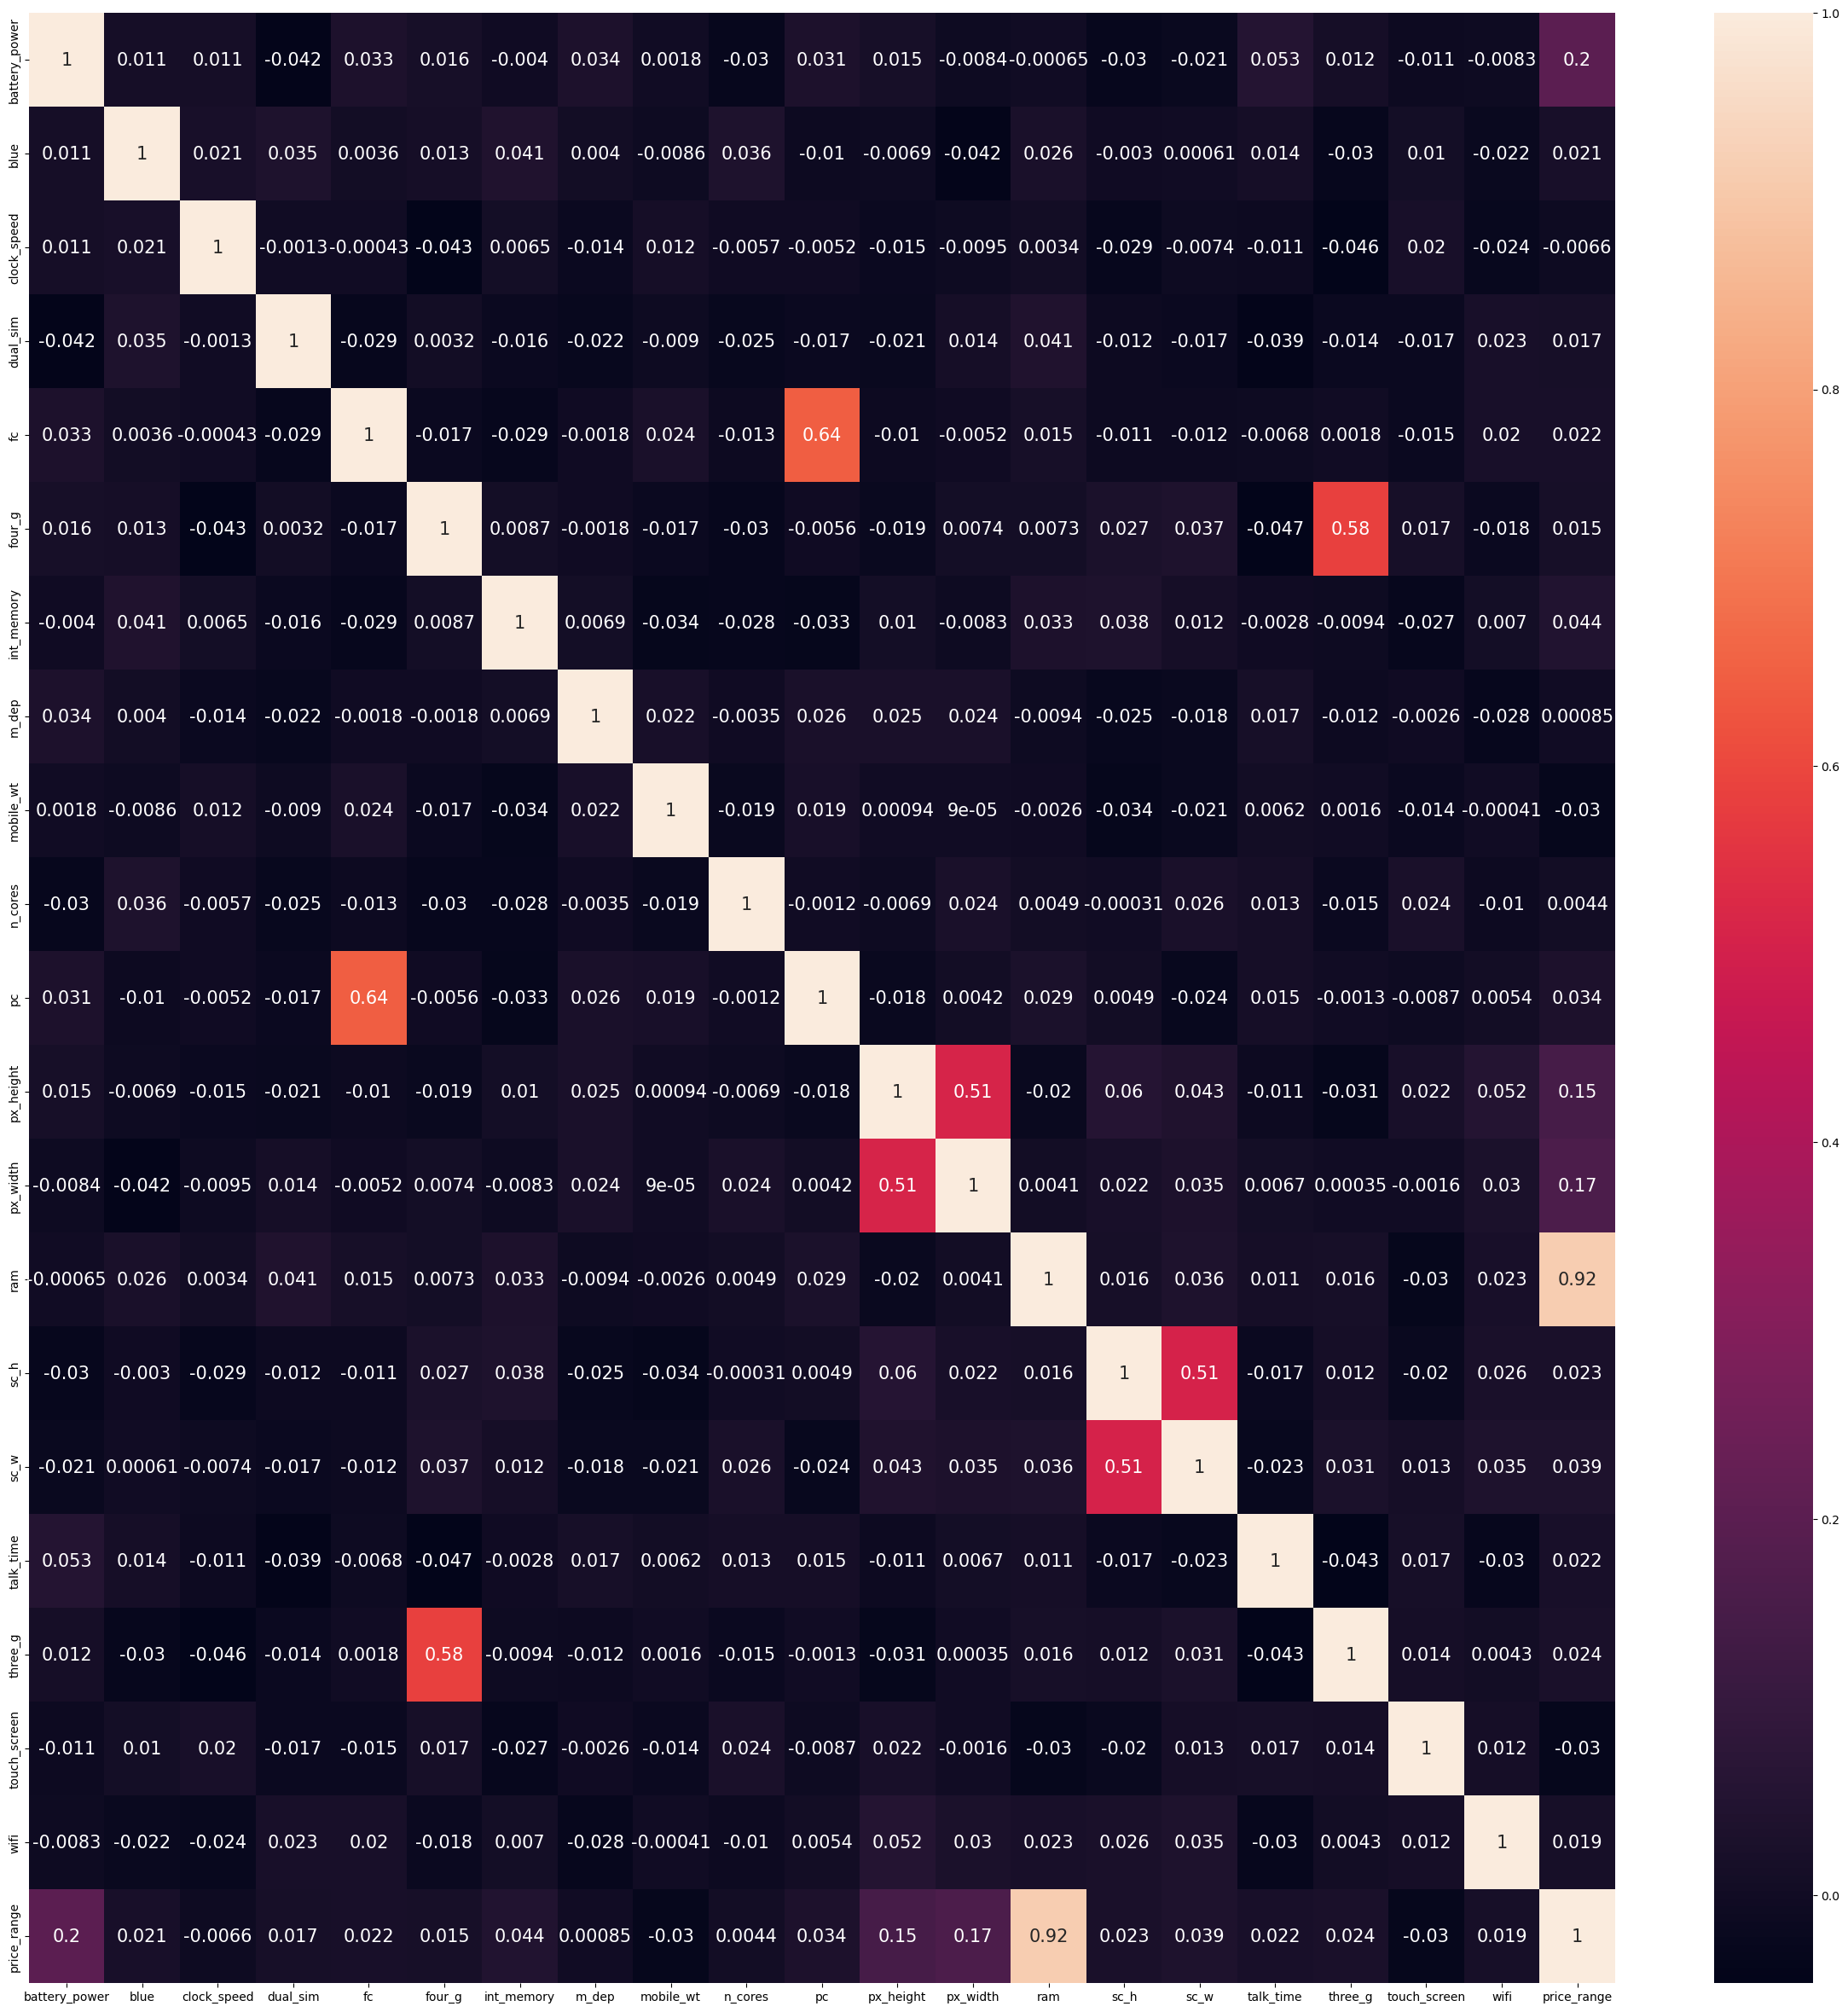

In [22]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),annot=True,annot_kws={"size":15})

### Model Creation

In [23]:
# Seperating dependent & independent feature
x=data.drop('price_range',axis=1)
y=data.price_range

In [24]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [25]:
print("x train shape",x_train.shape)
print("x test shape",x_test.shape)
print("y train shape",y_train.shape)
print("y train shape",y_test.shape)

x train shape (1600, 20)
x test shape (400, 20)
y train shape (1600,)
y train shape (400,)


##### Logestic Regression

In [26]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score 
from sklearn.linear_model import LogisticRegression

In [28]:
lr=LogisticRegression()
lr=lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.47      0.56      0.51        82
           2       0.59      0.48      0.53       114
           3       0.73      0.74      0.73        99

    accuracy                           0.66       400
   macro avg       0.65      0.65      0.65       400
weighted avg       0.66      0.66      0.65       400



In [30]:
print(confusion_matrix(y_pred, y_test))

[[88 17  0  0]
 [19 46 17  0]
 [ 1 31 55 27]
 [ 0  4 22 73]]


In [31]:
print(accuracy_score(y_pred, y_test))

0.655


##### KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn=knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [33]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       105
           1       0.96      0.88      0.92       107
           2       0.90      0.93      0.92        91
           3       0.95      0.98      0.96        97

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



In [34]:
print(confusion_matrix(y_pred, y_test))

[[102   3   0   0]
 [  6  94   7   0]
 [  0   1  85   5]
 [  0   0   2  95]]


In [35]:
print(accuracy_score(y_pred, y_test))

0.94


##### Support Vector Machine

In [37]:
from sklearn.svm import SVC

svc=SVC()
svc=svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

In [38]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       107
           1       0.96      0.91      0.94       103
           2       0.89      0.95      0.92        88
           3       0.97      0.95      0.96       102

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



In [39]:
print(confusion_matrix(y_pred, y_test))

[[104   3   0   0]
 [  4  94   5   0]
 [  0   1  84   3]
 [  0   0   5  97]]


In [40]:
print(accuracy_score(y_pred, y_test))

0.9475


##### Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb=gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)

In [42]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       104
           1       0.72      0.74      0.73        96
           2       0.77      0.70      0.73       103
           3       0.88      0.91      0.89        97

    accuracy                           0.82       400
   macro avg       0.81      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



In [43]:
print(confusion_matrix(y_pred, y_test))

[[96  8  0  0]
 [12 71 13  0]
 [ 0 19 72 12]
 [ 0  0  9 88]]


In [44]:
print(accuracy_score(y_pred, y_test))

0.8175


##### Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt=dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [46]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       101
           1       0.78      0.78      0.78        97
           2       0.76      0.75      0.75        95
           3       0.91      0.85      0.88       107

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



In [47]:
print(confusion_matrix(y_pred, y_test))

[[94  7  0  0]
 [14 76  7  0]
 [ 0 15 71  9]
 [ 0  0 16 91]]


In [48]:
print(accuracy_score(y_pred, y_test))

0.83


##### Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [50]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       106
           1       0.82      0.85      0.83        94
           2       0.86      0.81      0.84       100
           3       0.94      0.94      0.94       100

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



In [51]:
print(confusion_matrix(y_pred, y_test))

[[101   5   0   0]
 [  7  80   7   0]
 [  0  13  81   6]
 [  0   0   6  94]]


In [52]:
print(accuracy_score(y_pred, y_test))

0.89


##### Xgboost

In [54]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb=xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)

In [55]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       106
           1       0.91      0.89      0.90       100
           2       0.88      0.86      0.87        96
           3       0.93      0.95      0.94        98

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



In [56]:
print(confusion_matrix(y_pred, y_test))

[[103   3   0   0]
 [  5  89   6   0]
 [  0   6  83   7]
 [  0   0   5  93]]


In [57]:
print(accuracy_score(y_pred, y_test))

0.92


* KNN & Support Vector Machine algorithms give 94 & 94.7 accuracy.